In [1]:
from pysead import Truss_3D
import pandas as pd
%matplotlib widget

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
def pysead_blender_importer():
    nodes_sheet = pd.read_csv('nodes.csv')
    elements_sheet = pd.read_csv('bar_elements.csv')
    supports_sheet = pd.read_csv('supports.csv')
    forces_sheet = pd.read_csv('nodal_loads.csv')

    nodes = {}
    for i in range(len(nodes_sheet)):
        nodes.update({nodes_sheet['Node'][i]+1: [nodes_sheet['x_coord'][i], nodes_sheet['y_coord'][i], nodes_sheet['z_coord'][i]]})

    elements = {}
    for i in range(len(elements_sheet)):
        elements.update({elements_sheet['Element'][i]+1: [elements_sheet['Node_1'][i]+1, elements_sheet['Node_2'][i]+1]})

    support_array = [1,1,1]

    supports={}
    for i in range(len(supports_sheet)):
        supports.update({supports_sheet['Node'][i]+1: support_array})

    forces_array = [10,0,-10]

    forces={}
    for i in range(len(forces_sheet)):
        forces.update({forces_sheet['Node'][i]+1: forces_array})
    
    return(nodes, elements, supports, forces)

In [3]:
nodes, elements, supports, forces = pysead_blender_importer()

In [4]:
areas = {key: 0.002 for key in elements}
elasticity = {key: 200_000_000 for key in elements}

In [5]:
Truss = Truss_3D(nodes=nodes,
                elements=elements,
                supports=supports,
                forces=forces,
                elasticity=elasticity,
                cross_area=areas)

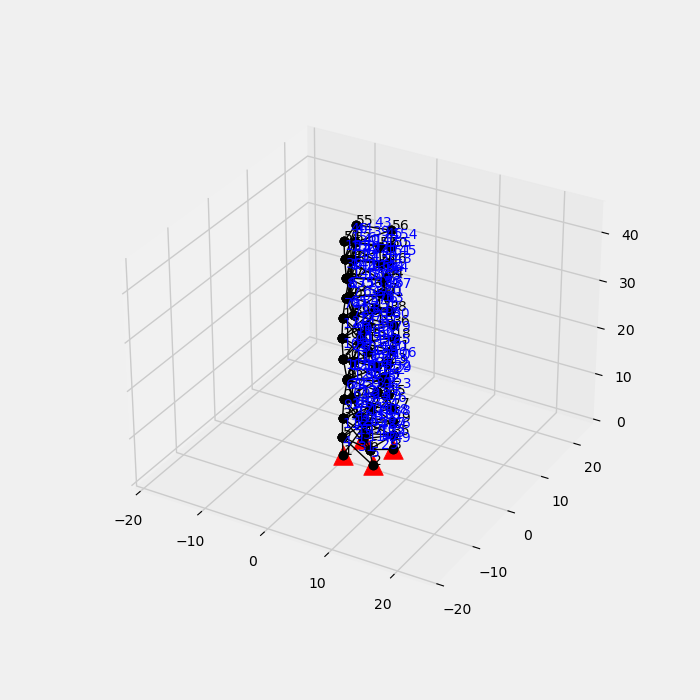

In [6]:
Truss.Draw_Truss_Setup()

In [7]:
Truss.Solve()

Positive Stress/Force is in Tension, Negative Stress/Force is in Compression


In [8]:
Truss.reactions_

{1: [20.23264, 8.15963, -182.86795],
 2: [-40.37593, -10.48088, 180.44038],
 3: [22.6972, 10.33758, 202.86802],
 4: [-42.55392, -8.01633, -160.44044]}

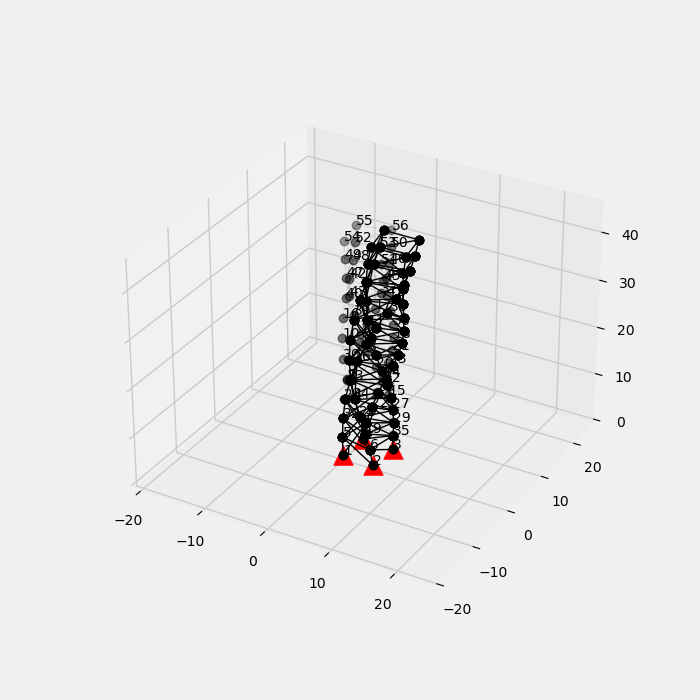

In [12]:
Truss.Draw_Truss_Displacements(magnification_factor=20)

In [10]:
Truss.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.0, 0.0, 0.0],
 4: [0.0, 0.0, 0.0],
 5: [0.00172, -0.00192, 0.00216],
 6: [0.00211, -0.00201, -0.00142],
 7: [0.00255, -0.00177, 0.00115],
 8: [0.06878, -0.01374, -0.01001],
 9: [0.03617, -0.00924, 0.00554],
 10: [0.07012, -0.00759, 0.01478],
 11: [0.07681, -0.00905, 0.00569],
 12: [0.03739, -0.0125, -0.01353],
 13: [0.0875, -0.01244, -0.00529],
 14: [0.02749, -0.0091, -0.00326],
 15: [0.02485, -0.0104, -0.01194],
 16: [0.09121, -0.00579, 0.01771],
 17: [0.09816, -0.00986, 0.00021],
 18: [0.07482, -0.01563, -0.0191],
 19: [0.0067, -0.00453, -0.00201],
 20: [0.05207, -0.01372, -0.01295],
 21: [0.0572, -0.0139, -0.01386],
 22: [0.00794, -0.00409, 0.00136],
 23: [0.04127, -0.01162, -0.00817],
 24: [0.01435, -0.00536, 0.00776],
 25: [0.01384, -0.00685, -0.00117],
 26: [0.03977, -0.0074, 0.0109],
 27: [0.01464, -0.0078, -0.00894],
 28: [0.01628, -0.00656, -1e-05],
 29: [0.00696, -0.00505, -0.00552],
 30: [0.05167, -0.00886, 0.01038],
 31: [0.0